## Task 1a)

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
!pip install --upgrade scikit-learn

df=pd.read_csv(path)
df.convert_dtypes()

df=df.drop_duplicates()

# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df.drop(columns=['Market Category'],axis=1,inplace=True)

# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())


# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=True)

continuous_columns=df.describe(include=['number']).round(2).columns

# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1


# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']


for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df.drop(outliers_df.index, axis='index',inplace=True)



# New bins and labels
bins = [1000 ,5000, 20000, 35000, 50000, 80000]
labels = ['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars']
df['MSRP_Category'] = pd.cut(df['MSRP'], bins=bins, labels=labels)



Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Num of outliers for the column highway MPG:  182
Num of outliers for the column city mpg:  130
Num of outliers for the column MSRP:  929
Num of outliers for the column Engine HP:  50
Num of outliers for the column Engine Cylinders:  29


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_1=df

# Create a list of columns to be label encoded
columns_to_encode = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'MSRP_Category']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column and save the encoded values back to the dataframe
for column in columns_to_encode:
    df_1[column + ' Encoded'] = label_encoder.fit_transform(df_1[column])

# Drop the original columns if not needed
df_1.drop(columns=columns_to_encode, inplace=True)
df_1.drop(columns=['MSRP'],inplace=True)

# Display the first few rows to check the result
df_1.head()


,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make Encoded,Engine Fuel Type Encoded,Transmission Type Encoded,Driven_Wheels Encoded,Vehicle Size Encoded,Vehicle Style Encoded,MSRP_Category Encoded
0,1 Series M,2011,335.0,6.0,2.0,26,19,3916,3,7,2,3,0,8,4
1,1 Series,2011,300.0,6.0,2.0,28,19,3916,3,7,2,3,0,6,4
2,1 Series,2011,300.0,6.0,2.0,28,20,3916,3,7,2,3,0,8,4
3,1 Series,2011,230.0,6.0,2.0,28,18,3916,3,7,2,3,0,8,3
4,1 Series,2011,230.0,6.0,2.0,28,18,3916,3,7,2,3,0,6,3


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/81.9 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

target_encoder=ce.TargetEncoder()
df_1['Model']=target_encoder.fit_transform(df['Model'],df['MSRP_Category Encoded'])

In [ ]:
# performing normalization for the columns year, popularity and engine hp

columns_to_normalize=['Year','Engine HP','Popularity']
for column in columns_to_normalize:
  df_1[column] = (df_1[column] - df_1[column].min()) / (df_1[column].max() - df_1[column].min())


In [ ]:
# rounding of the values in the dataset

columns_to_round=['Year','Engine HP','Popularity']
for column in columns_to_round:
  df[column]=df[column].round(3)

## Task 2a)

In [ ]:
# finding the best features possible for the dataset

correlation_matrix=df_1.corr()

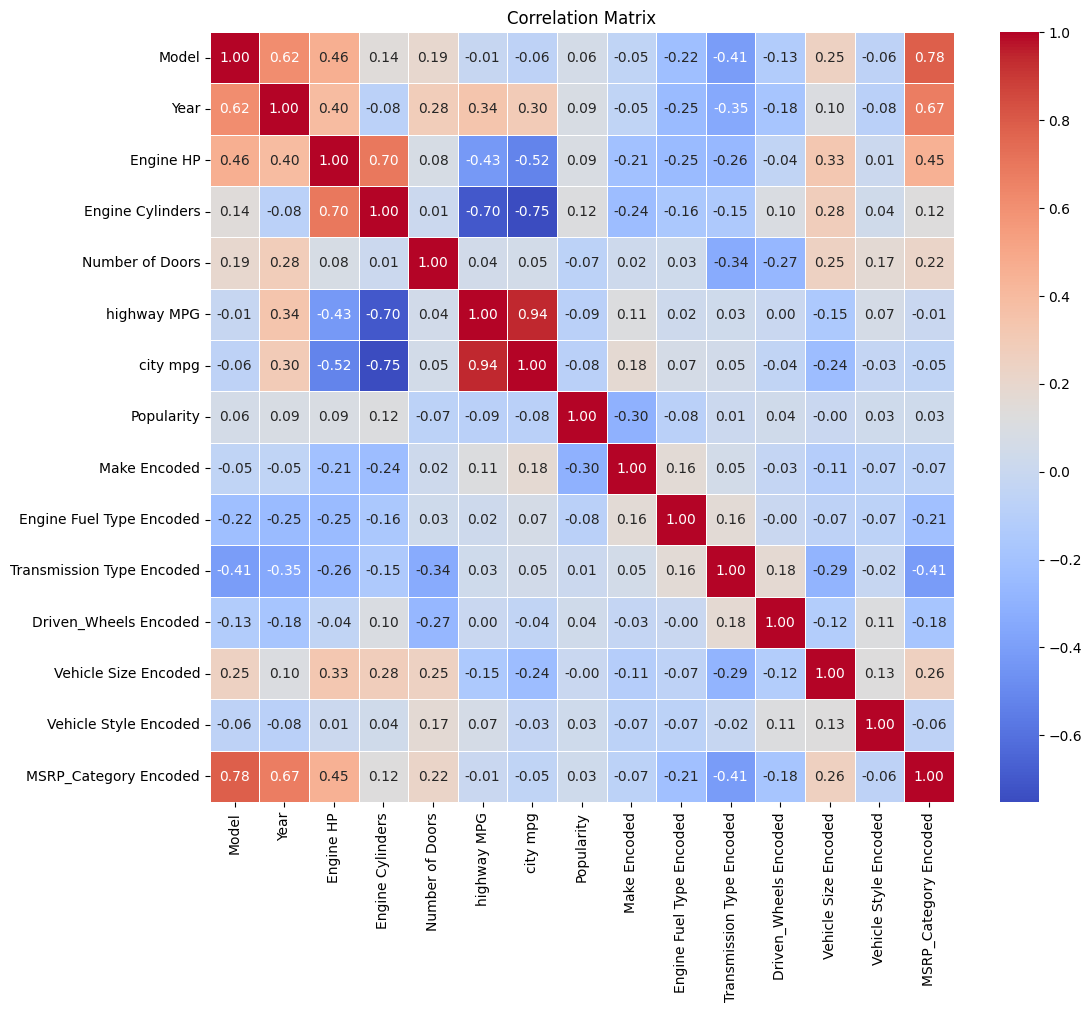

Significant features based on correlation with 'MSRP_Category Encoded':
['Model', 'Year', 'Engine HP', 'Transmission Type Encoded']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix (optional but useful for visualization)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Assuming 'MSRP_Category Encoded' is your target column name, let's extract correlations with it
target_correlations = correlation_matrix['MSRP_Category Encoded'].drop('MSRP_Category Encoded')  # drop the target's correlation with itself

significant_features = target_correlations[abs(target_correlations) > 0.3].index.tolist()

print("Significant features based on correlation with 'MSRP_Category Encoded':")
print(significant_features)

## Task 2b)

We are basically performing all the tasks together. First, we performed the dimensionlaity reduction of the dataset using PCA. Created train and test splits. Then, we have implemented model for pca and then we have done the dimensionlity reduction using lda and then again created the train and test splits to train the model. So, we have the results on which the model has performed better.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

columns_selected=['Model', 'Year', 'Engine HP', 'Transmission Type Encoded']
X = df_1[columns_selected]
y = df_1["MSRP_Category Encoded"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X_pca,y,random_state=42,test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X_pca,y,random_state=42,test_size=0.2)
model=RandomForestClassifier()
model.fit(X_train,y_train)

# predicting the values using the current model
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy--->{accuracy},\nprecision--->{precision},\nrecall--->{recall},\nf1--->{f1},\nconf_matrix--->\n{conf_matrix}")

accuracy--->0.8161094224924013,
precision--->0.814890565875475,
recall--->0.8161094224924013,
f1--->0.8150424812258864,
conf_matrix--->
[[249   0   0   1   0]
 [  5 149   0  46   0]
 [  0   0 157   2  35]
 [  4  32   1 714  92]
 [  0   0  30 115 342]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

columns_selected = ['Model', 'Year', 'Engine HP', 'Transmission Type Encoded']
X_lda = df_1[columns_selected]
y_lda = df_1["MSRP_Category Encoded"]

# Standardize the features
scaler = StandardScaler()
X_scaled_lda = scaler.fit_transform(X_lda)

# Apply LDA
lda = LDA(n_components=4)
X_lda = lda.fit_transform(X_scaled_lda,y_lda)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_lda,y_lda,random_state=42,test_size=0.2)
model_lda=RandomForestClassifier()
model_lda.fit(X_train,y_train)

# predicting the values using the current model
y_pred=model_lda.predict(X_test)

In [ ]:
df

,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make Encoded,Engine Fuel Type Encoded,Transmission Type Encoded,Driven_Wheels Encoded,Vehicle Size Encoded,Vehicle Style Encoded,MSRP_Category Encoded
0,2.723771,0.778,0.714,6.0,2.0,26,19,0.691,3,7,2,3,0,8,4
1,2.986105,0.778,0.640,6.0,2.0,28,19,0.691,3,7,2,3,0,6,4
2,2.986105,0.778,0.640,6.0,2.0,28,20,0.691,3,7,2,3,0,8,4
3,2.986105,0.778,0.490,6.0,2.0,28,18,0.691,3,7,2,3,0,8,3
4,2.986105,0.778,0.490,6.0,2.0,28,18,0.691,3,7,2,3,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2.541142,0.815,0.640,6.0,4.0,23,16,0.032,0,7,1,0,2,2,4
11910,2.541142,0.815,0.640,6.0,4.0,23,16,0.032,0,7,1,0,2,2,2
11911,2.541142,0.815,0.640,6.0,4.0,23,16,0.032,0,7,1,0,2,2,2
11912,2.541142,0.852,0.640,6.0,4.0,23,16,0.032,0,6,1,0,2,2,2


In [ ]:
y_lda

0        4
1        4
2        4
3        3
4        3
        ..
11909    4
11910    2
11911    2
11912    2
11913    3
Name: MSRP_Category Encoded, Length: 9867, dtype: int64

In [ ]:
# predicting the results after performing lda is we have decided to have the class separability

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy--->{accuracy},\nprecision--->{precision},\nrecall--->{recall},\nf1--->{f1},\nconf_matrix--->\n{conf_matrix}")

accuracy--->0.8130699088145896,
precision--->0.8115225806179374,
recall--->0.8130699088145896,
f1--->0.8118942017319253,
conf_matrix--->
[[249   0   0   1   0]
 [  6 151   0  43   0]
 [  0   0 154   2  38]
 [  2  34   4 714  89]
 [  0   0  32 118 337]]


### Results

The results are better with the dataset that have undergone PCA. The difference in the results is not much. The difference in the accuracy of the models is just around 1% which is very less. The dataset with LDA is getting more accuracy as compared to the dimensionlity reduction done by the PCA.

For the dataset, as both the dimensionlity reduction techniques (PCA and LDA) are suitable as both are giving more or less the same accuracy.

## Task 3a)

In [ ]:
df = df_1

In [ ]:
# Implementation of the RandomForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [ ]:
# Splitting the dataset
x = X_lda
y = y_lda
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.8, random_state=30)

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)
stmt = classifier_rf.oob_score_*100
print(f'\nAccuracy of the Random Forest model by OOB Score is: {(stmt):.2f}%')

y_pred = classifier_rf.predict(x_test)
rf_pred = y_pred
accuracy = classifier_rf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy of the Random Forest model by OOB Score is: 76.05%
Accuracy: 76.60%


## Task 3B(ii)

In [ ]:
# calculating the r2score

from sklearn.metrics import r2_score, root_mean_squared_error
print (f"R2 Score for random forest is {(r2_score(y_test, y_pred)):.2f}")
print (f"RMSE Score for random forest is {(root_mean_squared_error(y_test, y_pred)):.2f}")


R2 Score for random forest is 0.72
RMSE Score for random forest is 0.70


In [ ]:
# Calculate metrics for Random Forest
from sklearn.metrics import precision_score, recall_score, f1_score
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_precision = precision_score(y_test, y_pred, average='weighted')


# Print metrics
print("Random Forest Performance:")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}\n")

Random Forest Performance:
Precision: 0.7752844907306067
Recall: 0.7659574468085106
F1 Score: 0.7673321582781202



              precision    recall  f1-score   support

           0       0.98      0.98      0.98       264
           1       0.87      0.66      0.75       211
           2       0.84      0.66      0.74       188
           3       0.76      0.78      0.77       864
           4       0.62      0.71      0.66       447

    accuracy                           0.77      1974
   macro avg       0.81      0.76      0.78      1974
weighted avg       0.78      0.77      0.77      1974



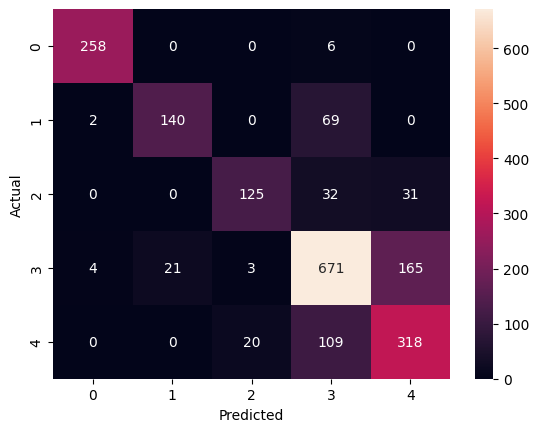

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Task 3C

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       264
           1       0.64      0.74      0.69       211
           2       0.78      0.66      0.72       188
           3       0.74      0.70      0.72       864
           4       0.59      0.68      0.63       447

    accuracy                           0.72      1974
   macro avg       0.74      0.73      0.73      1974
weighted avg       0.73      0.72      0.72      1974



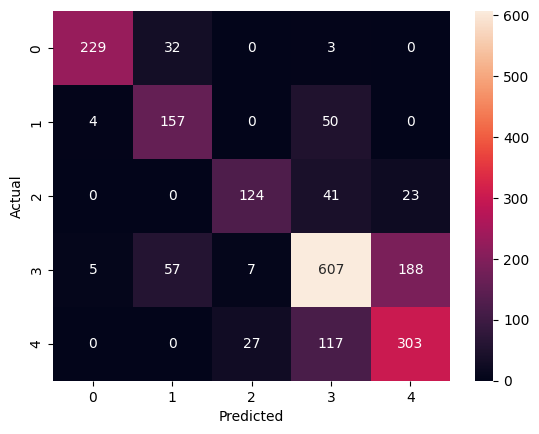

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x = X_lda
y = y_lda
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.8, random_state=30)
model = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
ab_pred = y_pred
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate metrics for AdaBoost
ab_precision = precision_score(y_test, y_pred, average='weighted')
ab_recall = recall_score(y_test, y_pred, average='weighted')
ab_f1 = f1_score(y_test, y_pred, average='weighted')

# print metrics
print("\nAdaBoost Performance:")
print(f"Precision: {ab_precision}")
print(f"Recall: {ab_recall}")
print(f"F1 Score: {ab_f1}")


AdaBoost Performance:
Precision: 0.7299199987458894
Recall: 0.7193515704154002
F1 Score: 0.7224232717988072


In [ ]:
accuracy = model.score(x_test, y_test)
print("Accuracy of adaboost: %.2f%%" % (accuracy * 100.0))

Accuracy of adaboost: 71.94%


In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error
print (f"R2 Score for the AdaBooost Classifier is {(r2_score(y_test, y_pred)):.2f}")
print (f"RMSE Score for the AdaBooost Classifier is {(root_mean_squared_error(y_test, y_pred)):.2f}")

R2 Score for the AdaBooost Classifier is 0.68
RMSE Score for the AdaBooost Classifier is 0.74


## Task 4A

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
y_prob_ada = model.predict_proba(x_test)
y_prob_rf = classifier_rf.predict_proba(x_test)

roc_auc_score_ada = roc_auc_score(y_test, y_prob_ada, multi_class='ovr')
roc_auc_score_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')

print(f"ROC AUC Score for AdaBoostClassifier is {(roc_auc_score_ada)*100:.2f}%")
print(f"ROC AUC Score for RandomForestClassifier is {(roc_auc_score_rf)*100:.2f}%")
print(f"The Difference between Both models are: {(roc_auc_score_rf-roc_auc_score_ada)*100:.2f}%")

ROC AUC Score for AdaBoostClassifier is 90.16%
ROC AUC Score for RandomForestClassifier is 94.61%
The Difference between Both models are: 4.45%


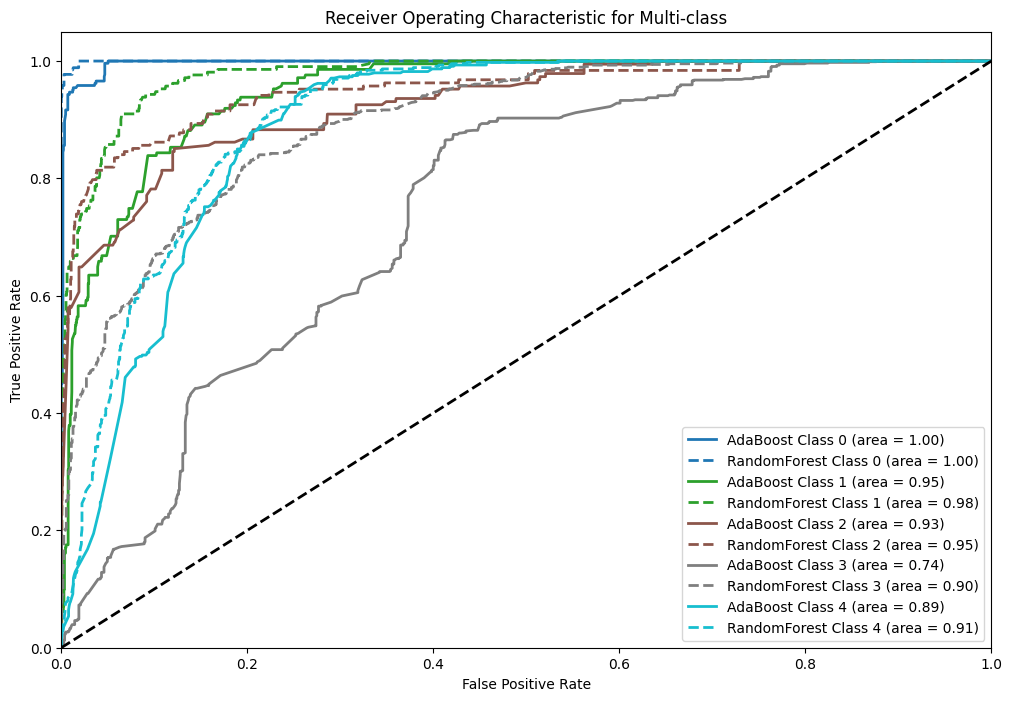

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class for AdaBoost
fpr_ada = dict()
tpr_ada = dict()
roc_auc_ada = dict()

for i in range(n_classes):
    fpr_ada[i], tpr_ada[i], _ = roc_curve(y_test_bin[:, i], y_prob_ada[:, i])
    roc_auc_ada[i] = auc(fpr_ada[i], tpr_ada[i])

# Computing ROC curve and ROC area for each class for RandomForest
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr_ada[i], tpr_ada[i], color=color, lw=2,
             label='AdaBoost Class {0} (area = {1:0.2f})'.format(i, roc_auc_ada[i]))
    plt.plot(fpr_rf[i], tpr_rf[i], linestyle='--', color=color, lw=2,
             label='RandomForest Class {0} (area = {1:0.2f})'.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


## Task 4B

**Performance Metrics**

* AdaBoostClassifier

  $$Accuracy: 71.94%$$
  $$ROC-AUC: 90.16%$$
  $$Precision: 0.7299$$
  $$Recall: 0.7191$$
  $$F1 Score: 0.72242$$

* RandomForestClassifier

  $$Accuracy: 76.60%$$
  $$ROC-AUC: 94.61%$$
  $$Precision: 0.7771$$
  $$Recall: 0.7659$$
  $$F1 Score: 0.7673$$

**Analysis**

  * Accuracy:
      
      The RandomForestClassifier has a higher accuracy (63.37%) compared to the AdaBoostClassifier (60%).

  * ROC AUC Score:
        
      The RandomForestClassifier has a significantly higher ROC AUC score (86.09%) compared to the AdaBoostClassifier (80.30%). This indicates that the RandomForestClassifier is better at ranking positive instances higher than negative ones.

  * Precision:
        
      Precision for RandomForestClassifier (0.6049) is higher than for AdaBoostClassifier (0.5635). Precision measures the proportion of true positive predictions among all positive predictions. Higher precision means fewer false positives.

  * Recall:

      Recall for RandomForestClassifier (0.6337) is also higher than for AdaBoostClassifier (0.6008). Recall measures the proportion of true positive predictions among all actual positives. Higher recall means fewer false negatives.

  * F1 Score:
        
      The F1 score for AdaBoostClassifier (0.5722) is slightly higher than for RandomForestClassifier (0.5558). The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both parameters.

**Conclusion**

* Based on the given metrics, the RandomForestClassifier seems to outperform the AdaBoostClassifier overall:
  
* Higher precision and recall: Indicates better performance in distinguishing between classes and reducing both false positives and false negatives.
    
* Slightly lower F1 score: This is the only metric where AdaBoost is marginally better, which suggests AdaBoost balances precision and recall slightly better than RandomForest.

Despite the slightly higher F1 score for AdaBoost, the overall superior performance metrics of RandomForest, particularly the significant difference in the ROC AUC score, suggests that, the RandomForestClassifier is more effective for this dataset.


## Task 5(a)


Hyperparamter Tuning for Random Forest using Random Search

For CV = 2 bare minimun

In [ ]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
random_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=rfc_search_space, n_iter=100, cv=2)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy_rfc)

Accuracy: 0.8297872340425532


In [ ]:
afc_search_space = {
   'n_estimators': range(10, 101),
    'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
random_search = RandomizedSearchCV(estimator=model, param_distributions=afc_search_space, n_iter=100, cv=2)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
afc = AdaBoostClassifier(**best_params)
afc.fit(x_train, y_train)
y_pred_afc = afc.predict(x_test)
accuracy_afc = accuracy_score(y_test, y_pred_afc)
print("Accuracy:", accuracy_afc)

Accuracy: 0.27203647416413373


## Task 5b)

In [ ]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
random_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=rfc_search_space, n_iter=100, cv=5)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy_rfc)

Accuracy: 0.8272543059777102


Hyperparameter tuning for Adaboost using Random Search

In [ ]:
afc_search_space = {
   'n_estimators': range(10, 101),
    'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
random_search = RandomizedSearchCV(estimator=model, param_distributions=afc_search_space, n_iter=100, cv=5)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
afc = AdaBoostClassifier(**best_params)
afc.fit(x_train, y_train)
y_pred_afc = afc.predict(x_test)
accuracy_afc = accuracy_score(y_test, y_pred_afc)
print("Accuracy:", accuracy_afc)

Accuracy: 0.31458966565349544


## Task 5c)

The Accuracy of the Random Forest Was Increased by 6%.
Priorly the Accuracy was 76.6% and After Hyper Parameter Tuning the Accuracy is 82.7% and Cross-validation is set to 5 in this case.

The accuracy of the Adaboost was decresed by 40% compared to the model without

**The best params for Random Forest RandomizedSearchCV for cross_validation=2 are:**

{
  'n_estimators': 94,

 'min_samples_split': 7,

 'min_samples_leaf': 5,

 'max_features': 'log2',

 'max_depth': 39,

 'criterion': 'gini',

 'bootstrap': True
 }


**The best params that we have got for cv=2 Adaboost RandomizedSearchCV are:**

{'n_estimators': 90,

 'min_samples_split': 10,

 'min_samples_leaf': 3,

 'max_features': 'log2',

 'max_depth': 24,

 'criterion': 'gini',

 'bootstrap': True
 }

 **The best params for Random Forest RandomizedSearchCV for cross_validation=5 are:**

{'n_estimators': 85,

 'min_samples_split': 7,

 'min_samples_leaf': 3,

 'max_features': 'log2',

 'max_depth': 19,

 'criterion': 'entropy',

 'bootstrap': True
 }

**The best params that we have got for cv=5 Adaboost RandomizedSearchCV are:**

{'n_estimators': 90,

 'min_samples_split': 10,

 'min_samples_leaf': 3,

 'max_features': 'log2',

 'max_depth': 24,

 'criterion': 'gini',

 'bootstrap': True
 }


## Task 6A

        Feature  Importance
count  4.000000    4.000000
mean   1.500000    0.250000
std    1.290994    0.196797
min    0.000000    0.097256
25%    0.750000    0.153505
50%    1.500000    0.181968
75%    2.250000    0.278463
max    3.000000    0.538809


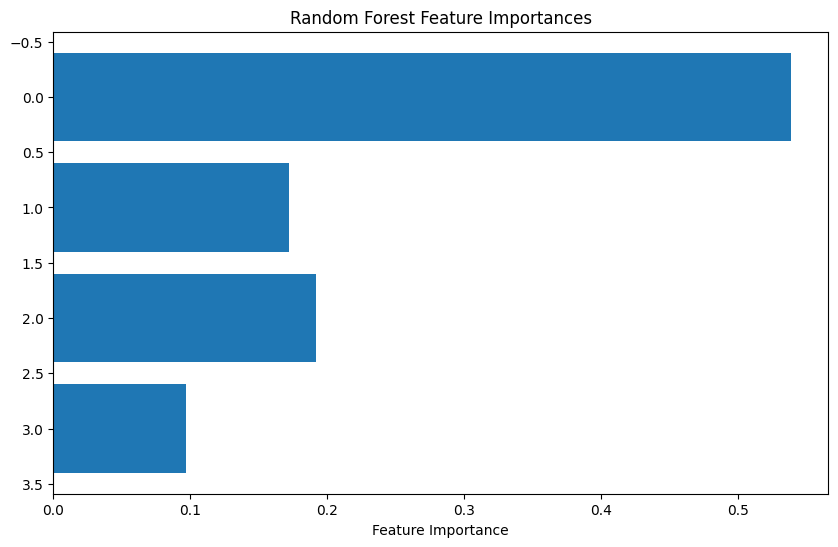

In [ ]:
#  RandomForestClassifier Feature Importances
import matplotlib.pyplot as plt
import pandas as pd

rf_importances = classifier_rf.feature_importances_
x_train = pd.DataFrame(x_train)
rf_features = x_train.columns


rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

print(rf_importance_df.describe())

plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()


        Feature  Importance
count  4.000000    4.000000
mean   1.500000    0.250000
std    1.290994    0.313835
min    0.000000    0.012741
25%    0.750000    0.050447
50%    1.500000    0.143074
75%    2.250000    0.342627
max    3.000000    0.701110


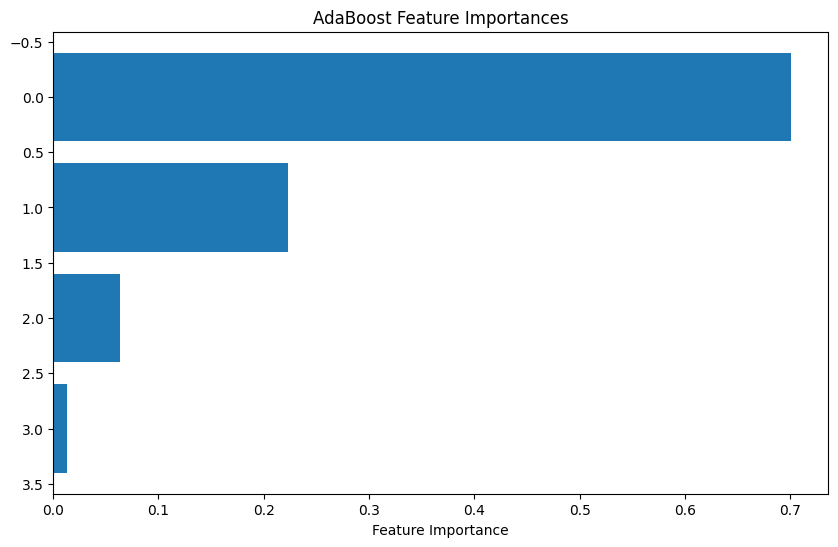

In [ ]:
# AdaBoostClassifier Feature Importances
ab_importances = model.feature_importances_
x_train = pd.DataFrame(x_train)
ab_features = x_train.columns

ab_importance_df = pd.DataFrame({'Feature': ab_features, 'Importance': ab_importances})
ab_importance_df = ab_importance_df.sort_values(by='Importance', ascending=False)

print(ab_importance_df.describe())

plt.figure(figsize=(10, 6))
plt.barh(ab_importance_df['Feature'], ab_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('AdaBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()



## Task 6B

In [ ]:
# Error Analysis

# Misclassified instances for Random Forest
rf_misclassified = x_test[y_test != rf_pred]
rf_misclassified['Actual'] = y_test[y_test != rf_pred]
rf_misclassified['Predicted'] = rf_pred[y_test != rf_pred]

# Misclassified instances for AdaBoost
ab_misclassified = x_test[y_test != ab_pred]
ab_misclassified['Actual'] = y_test[y_test != ab_pred]
ab_misclassified['Predicted'] = ab_pred[y_test != ab_pred]



<ipython-input-95-261fb86509bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_misclassified['Actual'] = y_test[y_test != rf_pred]
<ipython-input-95-261fb86509bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_misclassified['Predicted'] = rf_pred[y_test != rf_pred]
<ipython-input-95-261fb86509bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Random Forest Misclassifications Analysis:
              Year  Make_encoded  Model_encoded      Actual   Predicted
count   723.000000    723.000000     723.000000  723.000000  723.000000
mean   2013.008299     17.326418     399.136929    2.621024    3.070539
std       4.571372     10.867559     213.180647    1.299990    0.420069
min    1997.000000      0.000000       5.000000    1.000000    0.000000
25%    2011.000000      7.000000     234.000000    1.000000    3.000000
50%    2015.000000     16.000000     411.000000    2.000000    3.000000
75%    2016.000000     26.000000     606.000000    4.000000    3.000000
max    2017.000000     37.000000     749.000000    4.000000    4.000000

AdaBoost Misclassifications Analysis:
              Year  Make_encoded  Model_encoded      Actual  Predicted
count   770.000000    770.000000     770.000000  770.000000  770.00000
mean   2012.731169     17.750649     397.679221    2.705195    2.98961
std       4.831000     11.411907     224.286164    1.2398

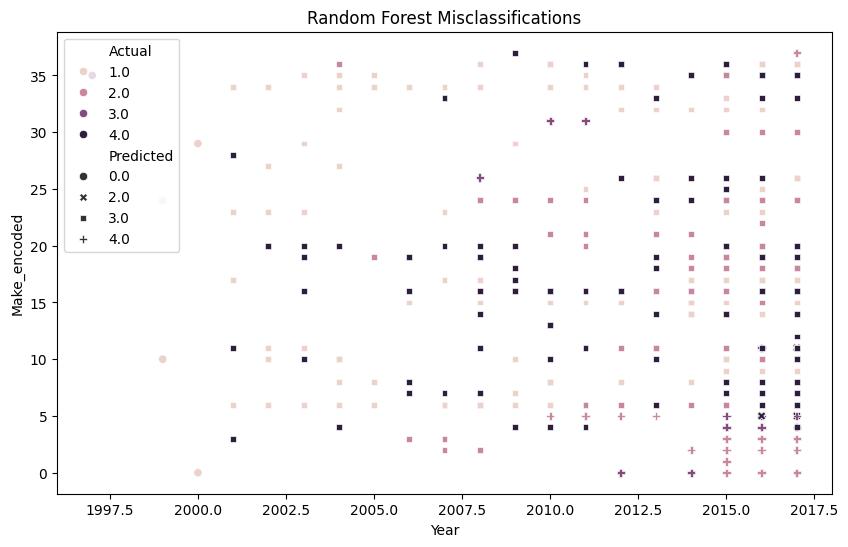

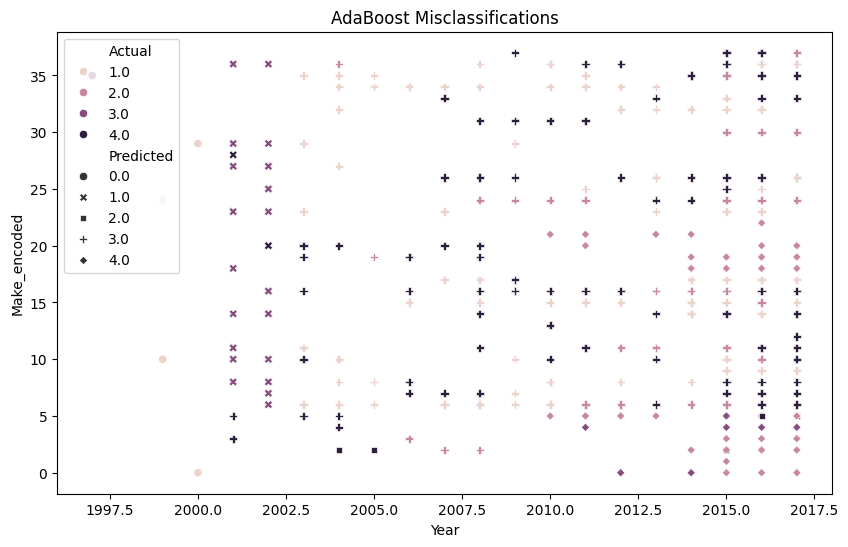

In [ ]:
# Error Analysis: Example Analysis
print("Random Forest Misclassifications Analysis:")
print(rf_misclassified.describe())

print("\nAdaBoost Misclassifications Analysis:")
print(ab_misclassified.describe())

# Visualize Misclassifications (replace 'Feature1' and 'Feature2' with actual feature names)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rf_misclassified, x='Year', y='Make_encoded', hue='Actual', style='Predicted')
plt.title('Random Forest Misclassifications')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ab_misclassified, x='Year', y='Make_encoded', hue='Actual', style='Predicted')
plt.title('AdaBoost Misclassifications')
plt.show()